In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
with open("ring_10_concurrent_messages_to100001nodes_step10000","r") as file_handle:
    file_content = file_handle.readlines()

In [3]:
results_list = []
results_dict = {}
for line in file_content:
    #print(line.strip())
    if line.startswith("ticks:"):
        results_dict['ticks'] = line.split(" ")[-1].strip()
    if line.startswith("nodes:"):
        results_dict['nodes'] = line.split(" ")[-1].strip()
    if line.startswith("real"):
        time_str = line.split("\t")[-1].strip()
        minutes = time_str.split("m")[0]
        seconds = time_str.split("m")[-1].replace("s","")
        results_dict['time [seconds]'] = int(minutes)*60 + float(seconds)
        results_list.append(results_dict)
        results_dict = {}
    #print(results_dict)

In [4]:
df = pandas.DataFrame(results_list)
#df

<Figure size 432x288 with 0 Axes>

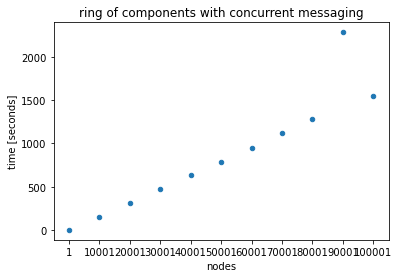

In [5]:
fig = plt.figure()
ax1 = df.plot.scatter(x='nodes',y='time [seconds]')
ax1.set_title("ring of components with concurrent messaging");
fig.savefig('scaling_of_ring_with_concurrent_messaging.png')